# **Assignment8**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

##**About Data Set**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Jaiprakash91194/Assessments/main/Task6/car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### The columns are:
1. Price: suggested retail price of the used 2005 GM car in excellent condition.`float`
2. Mileage: number of miles the car has been driven `int`
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet    `object`.
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier `object`.
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D `object`.         
6. Type: body type such as sedan, coupe, etc.`object`.      
7. Cylinder: number of cylinders in the engine`int`        
8. Liter: a more specific measure of engine size`float`     
9. Doors: number of doors`int`          
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)`int`
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)`int`
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)`int`




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


**From the given information type of evry datas are each columns are correct**.

In [5]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

###datas are clean

In [6]:
df.shape

(804, 12)

###delete duplicates

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(804, 12)

#### From the shape it's clear that we have no duplicates.

##**OUTLIERS EXIST OR NOT**

In [9]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


###**CHECK THE PRESENCE OF OUTLIERS**

In [10]:
def outlierpresence(df):
  for feature in df.select_dtypes(exclude="object").columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    total_outliers = df.loc[(df[feature] < lower_fence) | (df[feature] > upper_fence)]
    if len(total_outliers):
      print("{} Outliers present in {}".format(len(total_outliers), feature))
outlierpresence(df)

17 Outliers present in Price
5 Outliers present in Mileage
190 Outliers present in Doors
199 Outliers present in Cruise


In [11]:
def clip_outliers(df):
  for feature in df.select_dtypes(exclude="object").columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    df[feature] = df[feature].clip(lower_fence, upper_fence)
clip_outliers(df)

###**OUTLIER VALUES OVER THE DATASET**

##**EDA**

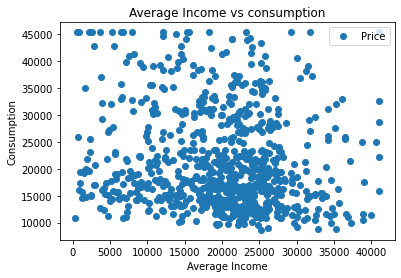

,Mileage,Price
Mileage,1.000000,-0.138997
Price,-0.138997,1.000000


In [12]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Mileage','Price']].corr()

##**TASK 1**

In [13]:
X = df[["Mileage"]].values
y = df["Price"].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

###**MODEL TRAINING**

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
coeff_df = pd.DataFrame(regressor.coef_,['Price'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Price,-1330.312225


In [18]:
y_pred 

array([20415.70505539, 20637.08650353, 20825.19675137, 22045.99387001,
       20615.65217257, 21025.62374163, 19797.30861138, 18776.45860992,
       23232.87995758, 24164.79348132, 20061.39876375, 20714.66598499,
       20521.59704865, 22990.54405156, 21469.82625715, 20420.82370159,
       20608.77399174, 21776.14524067, 21375.45121784, 20788.88635489,
       21935.30314594, 20753.37574688, 20022.84895956, 20456.3343096 ,
       20643.64476897, 19717.6496799 , 20570.22418754, 20110.18586034,
       22409.89762327, 21107.04220774, 20248.70922312, 21216.61322796,
       20519.67755632, 21844.76709128, 20622.3703957 , 21461.98833016,
       23308.53994672, 22757.64564947, 22342.55543421, 21661.13565887,
       22473.56078538, 24108.96824621, 20865.66604789, 20147.61596068,
       21132.63543874, 19553.69304381, 23779.4553971 , 19973.1021168 ,
       20046.68265593, 20284.37978883, 21970.01396548, 21104.48288464,
       22624.88076366, 21337.70120212, 22923.20186249, 23470.73704817,
      

In [19]:
y_test

array([14862.0938696 , 16256.23616761, 15802.65286086, 45061.95193515,
       12425.38917116, 25618.2818848 , 15174.34661257, 26012.37462483,
       33005.77995793, 45383.68078366, 13811.15502229, 20839.14996547,
       19774.24906607, 32746.1313865 , 25959.12203037, 15724.25217039,
       24852.49528068, 22004.93043754, 20676.16551095, 14398.92269258,
       10354.04385207, 13106.90042366, 19204.80934142, 21562.04757786,
       20406.09950289, 17768.05950543, 26698.07815105, 16345.94374691,
       19682.03501065, 11472.02276142, 10770.10655376, 11615.02101757,
       43892.46788041, 31002.73441998, 20017.96843019, 25508.21095611,
       18957.8900429 , 17202.8340553 , 35129.34077102, 23547.23944288,
       11318.00808925, 19446.88294074, 31970.54207548, 16300.46523985,
       19294.78750435, 11464.62885878, 20698.07708317, 14077.96885276,
       16713.98468931,  9482.21940385, 15821.94971816, 12507.48526743,
       13681.69800349, 13998.12927577, 18910.80428599, 14061.12276502,
      

In [20]:
regressor.intercept_ # c 

21045.817902928175

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,14862.093870,20415.705055
1,16256.236168,20637.086504
2,15802.652861,20825.196751
3,45061.951935,22045.993870
4,12425.389171,20615.652173
...,...,...
156,18548.978593,20919.731748
157,36332.894685,20234.632946
158,21683.031464,19974.541736
159,18040.144006,22395.021558


In [22]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.0097823826807798


###**The given model has no good fit.**

##**TASK 2**

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/Jaiprakash91194/Assessments/main/Task6/car_data.csv")

In [24]:
b = []
for i in df.keys():
  b.append(i)
print(b)  


['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [25]:
# Use mileage, cylinders, liters, doors, cruise, sound, and leather 
X = df[['Mileage','Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values#array of features
y = df['Price'].values


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

###**MODEL TRAINING**

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
coeff_df = pd.DataFrame(regressor.coef_,[['Mileage','Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1371.001168
Cylinder,5362.757156
Liter,-636.102794
Doors,-1161.421897
Cruise,2605.283666
Sound,-1046.235630
Leather,1599.923922


In [30]:
regressor.coef_

array([-1371.0011684 ,  5362.75715593,  -636.10279397, -1161.42189697,
        2605.28366558, -1046.23562996,  1599.92392244])

In [31]:
regressor.intercept_ # c 

21286.771470559223

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,14862.093870,26841.569929
1,16256.236168,23107.117980
2,15802.652861,10715.787911
3,45061.951935,33065.377426
4,12425.389171,14351.796236
...,...,...
156,18548.978593,23567.742988
157,36332.894685,33476.069241
158,21683.031464,20174.792218
159,18040.144006,31235.598323


In [33]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.34021415975117064


##**Tasks, Hard Mode**

In [34]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Mileage','Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', False),
 ('Leather', True)]

###**The best combination of factors to predict price are 'Cylinder', 'Cruise' and 'Leather'**

###**Fitting by dummy variables**
* 
Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/Jaiprakash91194/Assessments/main/Task6/car_data.csv")

In [36]:
b = []
for i in df.keys():
  b.append(i)
print(b)  

['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [37]:
df = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [38]:
b = []
for i in df.keys():
  b.append(i)
print(b)  

['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']


####**We don't want `Price` and `Trim` in the feature set `b`, we newly defined from the dummies**

In [39]:
b.remove('Price')
b.remove('Trim')
print(b)

['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']


####**Now we are taking the feature set as `b`**

In [40]:
df.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [41]:
X = df[b].values#array of features
y = df['Price'].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

###**MODEL TRAINING**

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
coeff_df = pd.DataFrame(regressor.coef_,[b], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Mileage,-1.536658e+03
Cylinder,8.337871e+02
Liter,1.214920e+03
Doors,3.387945e+14
Cruise,-5.028339e-01
Sound,8.515677e+01
Leather,1.673923e+02
Make_Buick,1.076390e+15
Make_Cadillac,-3.679294e+14
Make_Chevrolet,-3.762325e+15


In [46]:
regressor.intercept_ # c 

21283.110526804758

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,14862.093870,15230.610527
1,16256.236168,17518.610527
2,15802.652861,15354.610527
3,45061.951935,43885.110527
4,12425.389171,12579.610527
...,...,...
156,18548.978593,19149.610527
157,36332.894685,35010.110527
158,21683.031464,20105.110527
159,18040.144006,21902.110527


In [48]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9796694111527388


####**Here we have 97% accuracy of R-2 score**

In [49]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(b,selector.support_))

[('Mileage', False),
 ('Cylinder', False),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', False),
 ('Sound', False),
 ('Leather', False),
 ('Make_Buick', False),
 ('Make_Cadillac', False),
 ('Make_Chevrolet', False),
 ('Make_Pontiac', True),
 ('Make_SAAB', False),
 ('Make_Saturn', False),
 ('Model_9-2X AWD', False),
 ('Model_9_3', False),
 ('Model_9_3 HO', False),
 ('Model_9_5', False),
 ('Model_9_5 HO', False),
 ('Model_AVEO', False),
 ('Model_Bonneville', False),
 ('Model_CST-V', False),
 ('Model_CTS', False),
 ('Model_Cavalier', False),
 ('Model_Century', False),
 ('Model_Classic', False),
 ('Model_Cobalt', False),
 ('Model_Corvette', False),
 ('Model_Deville', False),
 ('Model_G6', False),
 ('Model_GTO', True),
 ('Model_Grand Am', False),
 ('Model_Grand Prix', False),
 ('Model_Impala', False),
 ('Model_Ion', False),
 ('Model_L Series', False),
 ('Model_Lacrosse', False),
 ('Model_Lesabre', False),
 ('Model_Malibu', False),
 ('Model_Monte Carlo', False),
 ('Model_Park Avenue', Fa

In [50]:
sorted(list(zip(selector.ranking_,b)))


[(1, 'Make_Pontiac'),
 (1, 'Model_GTO'),
 (1, 'Model_Sunfire'),
 (2, 'Model_Vibe'),
 (3, 'Model_Grand Am'),
 (4, 'Model_Grand Prix'),
 (5, 'Model_Bonneville'),
 (6, 'Model_G6'),
 (7, 'Type_Coupe'),
 (8, 'Type_Sedan'),
 (9, 'Type_Hatchback'),
 (10, 'Type_Wagon'),
 (11, 'Type_Convertible'),
 (12, 'Make_Cadillac'),
 (13, 'Model_CTS'),
 (14, 'Model_Deville'),
 (15, 'Model_STS-V6'),
 (16, 'Model_STS-V8'),
 (17, 'Model_CST-V'),
 (18, 'Model_XLR-V8'),
 (19, 'Make_SAAB'),
 (20, 'Model_9_5'),
 (21, 'Model_9_5 HO'),
 (22, 'Model_9_3'),
 (23, 'Model_9_3 HO'),
 (24, 'Model_9-2X AWD'),
 (25, 'Make_Buick'),
 (26, 'Make_Chevrolet'),
 (27, 'Make_Saturn'),
 (28, 'Model_Park Avenue'),
 (29, 'Model_Lacrosse'),
 (30, 'Model_Lesabre'),
 (31, 'Model_Century'),
 (32, 'Doors'),
 (33, 'Model_Ion'),
 (34, 'Model_L Series'),
 (35, 'Model_Corvette'),
 (36, 'Model_Impala'),
 (37, 'Model_Malibu'),
 (38, 'Model_Monte Carlo'),
 (39, 'Model_AVEO'),
 (40, 'Model_Cavalier'),
 (41, 'Model_Cobalt'),
 (42, 'Model_Classic')